## Abstractive Summarization 
Selects the most salient sentences in the text and then rewrites them in an abstract manner, like a human

Model attempts to understand the context of the text before summarizing. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import transformers
import nltk

In [1]:
from transformers import pipeline

In [3]:
df = pd.read_csv('part2.csv')
df

,Unnamed: 0,category,url,title,summary,full_text,extracted_summary
0,0,Culture,/mank-citizen-kane-watch-online-stream-streami...,How to Watch 'Citizen Kane' Online After You'v...,"""Mank"" is an inventive retelling of the story ...",Mank sees Netflix celebrating Hollywood's gold...,The Amazon synopsis for the movie gives viewer...
1,1,Opinion,/bidens-chance-challenge-china-opinion-1552152,Biden's Chance to Challenge China,"China's strategy is relentless, sophisticated ...",When it comes to managing relations with China...,China will not cease its efforts to erode U.S....
2,2,World,/shootout-rival-mexican-cartel-gang-members-15...,Several Dead In Shootout Between Rival Mexican...,One report suggested dozens had been killed wh...,A shootout in the western Mexican state of Mic...,The attack was said to have begun in the small...
3,3,World,/china-media-says-us-europe-tensions-inevitabl...,China Media Says U.S.-Europe Tensions Inevitab...,Biden said in an interview published this week...,Chinese state media has predicted more tension...,"On Thursday, the state-run Global Times newspa..."
4,4,Opinion,/san-francisco-jon-ossoff-opinion-1552197,San Francisco Jon Ossoff,"""San Francisco,"" not Georgia, is a more accura...","I refer to ""San Francisco"" Jon Ossoff because ...",Ossoff's defense of the speeches could alienat...
...,...,...,...,...,...,...,...
1495,1495,My Turn,/i-am-undocumented-my-child-u-s-citizen-why-go...,"'I'm Undocumented, But My Child Is American. W...",I'm her mom. I must be her voice and I must fi...,When I first found out in March that my family...,"As an American citizen, my daughter should als..."
1496,1496,Opinion,/wisconsin-no-longer-home-no-longer-safe-opini...,Wisconsin Is No Longer at Home—and No Longer Safe,This week's Supreme Court's decision will cost...,"Here they go again. On Wednesday night, the co...",This is the same Republican legislature that e...
1497,1497,U.S.,/trump-coronavirus-vaccine-operation-1504551,Trump Compares Coronavirus Vaccine Search to t...,The president said the program will be unlike ...,President Donald Trump unveiled plans to find ...,Speaking at a press conference in the White Ho...
1498,1498,U.S.,/tsa-check-temperatures-passengers-airports-15...,TSA Plan to Check Passenger Temperatures at Se...,A report claims airport passenger temperature ...,The Transportation Security Administration (TS...,"""The health and safety of our Transportation S..."


In [4]:
# Step 3: Give PEGASUS a try

from transformers import PegasusTokenizer, PegasusForConditionalGeneration
import torch

model = PegasusForConditionalGeneration.from_pretrained('google/pegasus-xsum')
tokenizer = PegasusTokenizer.from_pretrained('google/pegasus-xsum')

#batch = tokenizer.prepare_seq2seq_batch(src_text, truncation=True, padding='longest', return_tensors='pt').to(torch_device)

ARTICLE_TO_SUMMARIZE = ( "PG&E stated it scheduled the blackouts in response to forecasts for high winds amid dry conditions. The aim is to" "reduce the risk of wildfires. Nearly 800 thousand customers were scheduled to be affected by the shutoffs which were expected to last" "through at least midday tomorrow.")
inputs = tokenizer([ARTICLE_TO_SUMMARIZE], max_length=1024, return_tensors='pt')

# Generate Summary
summary_ids = model.generate(inputs['input_ids'])
print([tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=False) for g in summary_ids])



Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


["California's largest electricity provider has turned off power to hundreds of thousands of customers."]


In [5]:
# Get a histogram of the number of words/tokens in each summary
summaries = df.iloc[:,6]
nltk.download('punkt')
from nltk import tokenize
import re

length = []
for summ in summaries:
    sentence = tokenize.sent_tokenize(summ)


    #lower caps
    lst=[s.lower() for s in sentence]
    #lst
        
    #remove non-digit char
    new_lst = [re.sub('[^A-z]',' ',s) for s in lst]
        
    #split list of sentences into list of list of words
    words = [tokenize.word_tokenize(s) for s in new_lst]
    num_words = [len(l) for l in words]
    sum_words = sum(num_words)
    length.append(sum_words)


[nltk_data] Downloading package punkt to /Users/yuanqi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


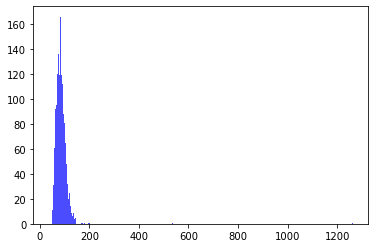

In [6]:
n, bins, patches = plt.hist(x=length, bins='auto', color='blue',
                            alpha=0.7, rwidth=0.85)

In [7]:
# Use PEGASUS on the first text in the DataFrame

full_text = df.iloc[3][5]

from transformers import PegasusTokenizer, PegasusForConditionalGeneration

model = PegasusForConditionalGeneration.from_pretrained('google/pegasus-xsum')
tokenizer = PegasusTokenizer.from_pretrained('google/pegasus-xsum')

inputs = tokenizer([full_text], max_length=100, return_tensors='pt')

# Generate Summary
summary_ids = model.generate(inputs['input_ids'])
p_summary = [tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=False) for g in summary_ids]



Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [10]:
print("Article: ", full_text)
print("Summary: ", p_summary[0])

Article:  Chinese state media has predicted more tensions between the U.S. and its European allies, even under projected President-elect Joe Biden's new administration, which the veteran politician has said will put alliances and international cooperation at the core of its foreign policy. Biden has so far given little indication of how he will approach the China challenge, though on the campaign trail tried to disarm allegations that he would be soft on Beijing by promising a tougher strategy. In an interview with The New York Times published Wednesday, Biden said the "best China strategy" was to make sure all American allies are "on the same page," something he hopes to achieve "in the opening weeks" of his term. Biden said his trade policies would focus on "China's abusive practices," such as "stealing intellectual property, dumping products, illegal subsidies to corporations" and forced technology transfers. Biden said he would not make "immediate" moves to lift the tariffs imposed

## Summarization of all text

In [ ]:
pegasus_summary = []
from transformers import PegasusTokenizer, PegasusForConditionalGeneration

for i in range(0,500):

    full_text = df.iloc[i][5]

    model = PegasusForConditionalGeneration.from_pretrained('google/pegasus-xsum')
    tokenizer = PegasusTokenizer.from_pretrained('google/pegasus-xsum')

    inputs = tokenizer([full_text], max_length=100, return_tensors='pt')

    # Generate Summary
    summary_ids = model.generate(inputs['input_ids'])
    p_summary = [tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=False) for g in summary_ids]
    pegasus_summary.append(p_summary[0])



In [ ]:
df['pegasus_summary'] = pegasus_summary
df.to_csv('part3.csv')